# Diabetes Prediction
## Gaussian Naive Bayes
---

In this notebook, a gaussian naive bayes model is trained using the diabetes dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv("../Data/diabetes/diabetes_prediction_dataset.csv")

Now that we have our data ready, let's see some information about it.

In [3]:
dataset.head(8)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0


In [4]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There are no missing values in the dataset, also two columns have categorical values, so we need to encode them.

In [7]:
label_encoder = LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])
dataset['smoking_history'] = label_encoder.fit_transform(dataset['smoking_history'])

## Data Visualization

In [8]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
target = 'diabetes'

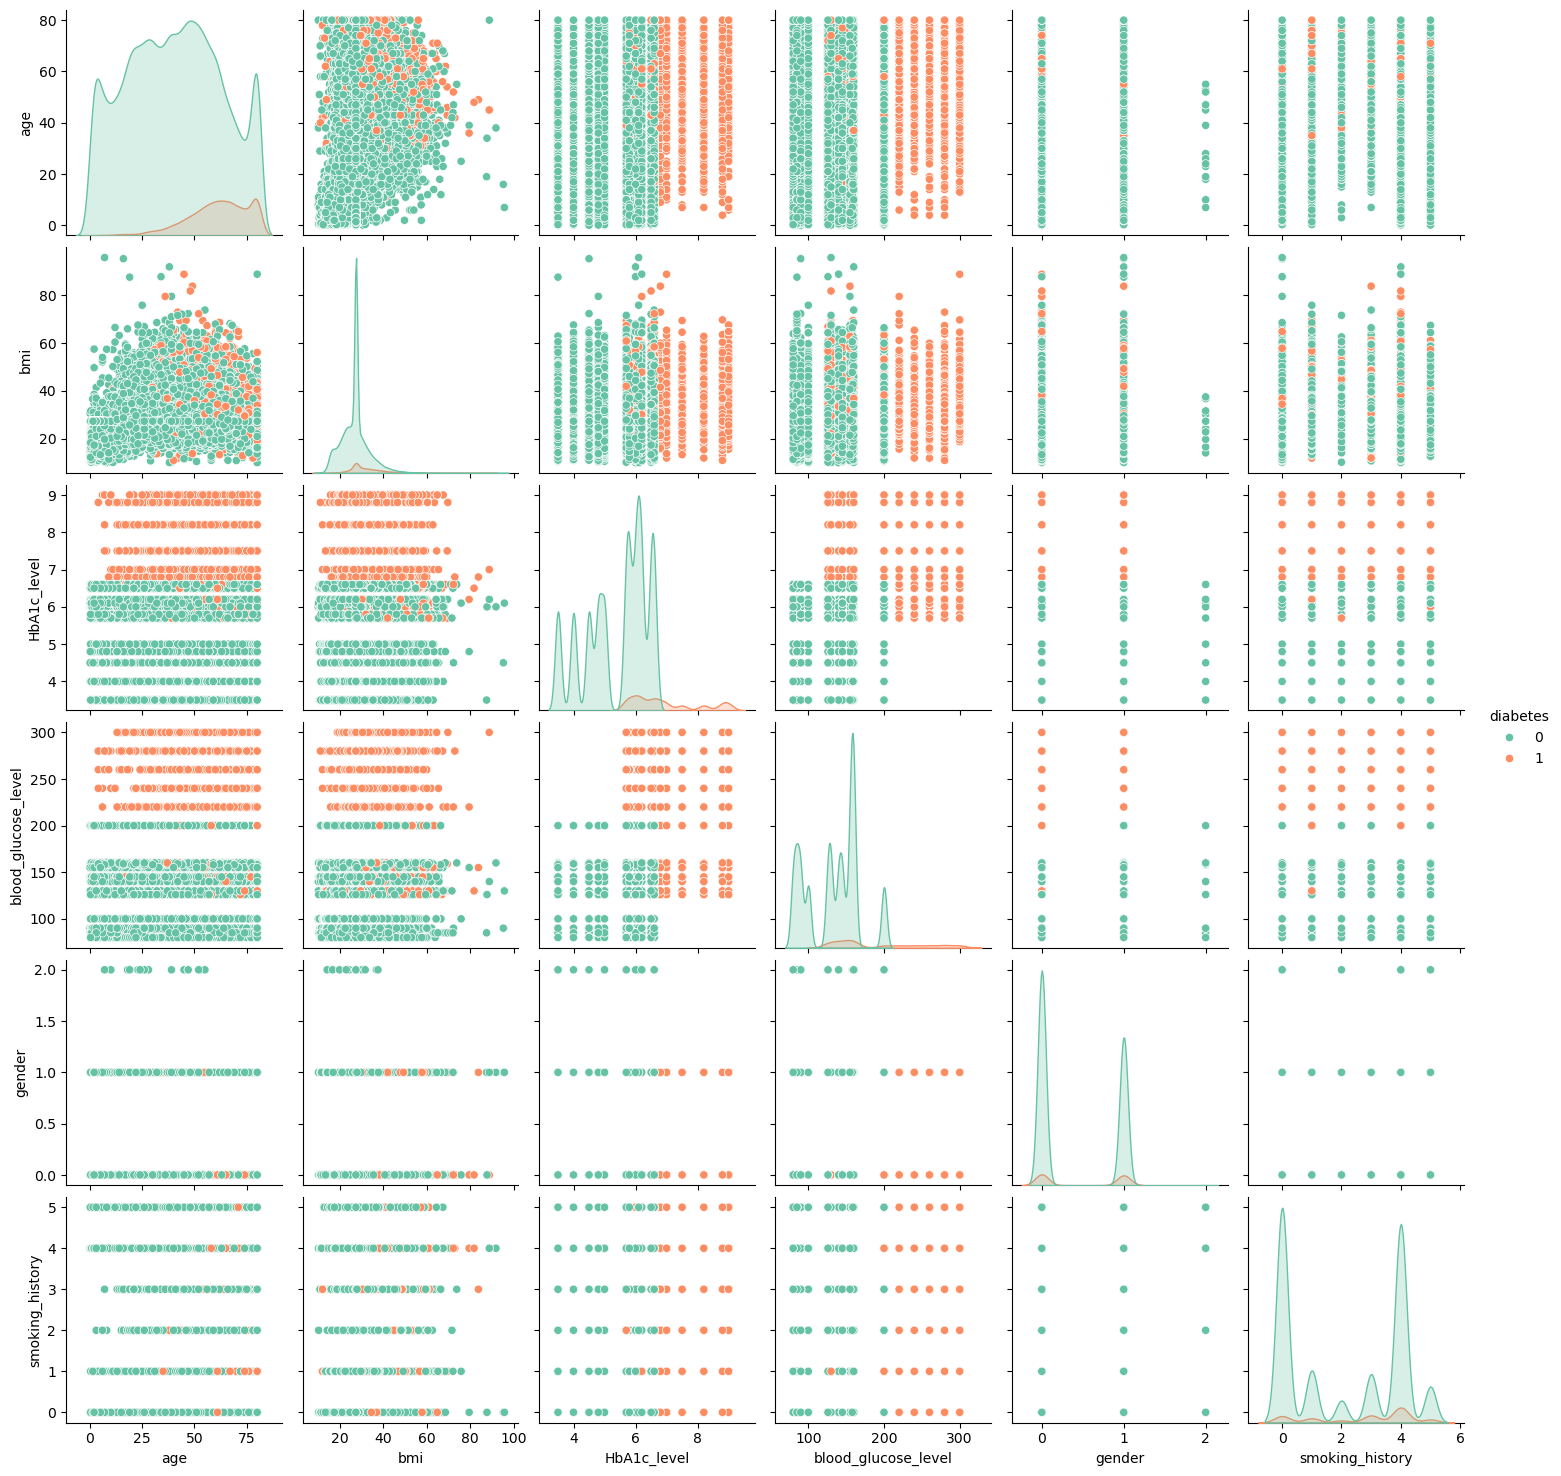

In [9]:
sns.pairplot(dataset[numerical_features + [target] + ["gender", 'smoking_history']], hue=target, palette='Set2')
plt.show()

In [10]:
# Define the features and the target
y = dataset['diabetes']
X = dataset.drop(['diabetes'], axis=1)

In [11]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Training

In [13]:
gnb = GaussianNB()

In [14]:
gnb.fit(X_train, y_train)

GaussianNB()

In [15]:
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

## Evaluation

In [16]:
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

In [17]:
print(f"Training Data report: \n{train_report}")

Training Data report: 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     64028
           1       0.45      0.65      0.53      5972

    accuracy                           0.90     70000
   macro avg       0.71      0.79      0.74     70000
weighted avg       0.92      0.90      0.91     70000



In [18]:
print(f"Test Data report: \n{test_report}")

Test Data report: 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27472
           1       0.45      0.65      0.53      2528

    accuracy                           0.90     30000
   macro avg       0.71      0.79      0.74     30000
weighted avg       0.92      0.90      0.91     30000



Since our dataset is imbalanced, as shown in support column of the report, we will use the **weighted average F1-score** as the evaluation metric. Based on the evaluation, we can see the model is not overfitted as the training and validation scores are close to each other.

**Result**: The model is able to predict the diabetes cases with an weighted F1-score of ***0.91***

## Confusion Matrix

- ### Confusion Matrix for Training Data

In [19]:
train_matrix = confusion_matrix(y_train, y_train_pred)

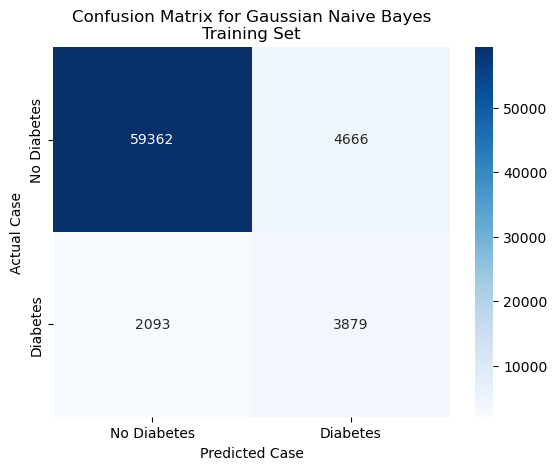

In [20]:
sns.heatmap(train_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual Case')
plt.xlabel('Predicted Case')
plt.title('Confusion Matrix for Gaussian Naive Bayes\nTraining Set')
plt.show()

- ### Confusion Matrix for Test Data

In [21]:
test_matrix = confusion_matrix(y_test, y_test_pred)

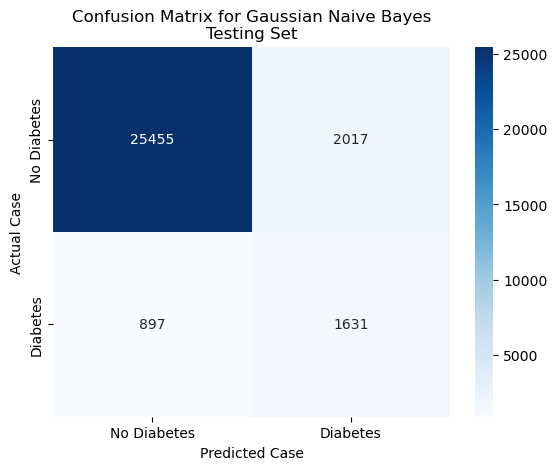

In [22]:
sns.heatmap(test_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual Case')
plt.xlabel('Predicted Case')
plt.title('Confusion Matrix for Gaussian Naive Bayes\nTesting Set')
plt.show()